In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

# Загрузка и первичный анализ набора данных
Для обработки пропусков в числовых данных будем использовать набор данных об [автомобилях](http://archive.ics.uci.edu/ml/datasets/Automobile).
<a id='data_desc'></a>
Набор данных состоит из спецификации автомобилей с описанием различных технических параметров, а также двух специальных показателей:
1. "Символизирование" (`symboling`) - оценка страхового риска. Показывает степень, с которой автомобиль более "рискованный"("опасный"), чем показывает его цена. Автомобилю изначально назначают символ фактора риска, связанный с его ценой. Далее, если он более (или менее) рискованный, то символ смещается вверх (или вниз) по шкале. Актуарии (специалисты по страховой математике) называют этот процесс "символизированием". Оценка "+3" означает, что авто "рискованное", "-3" - что оно достаточно безопасное.
2. Нормализованные потери (`normalized-losses`) - относительная средняя сумма возмещения убытков за год застрахованного автомобиля. Этот показатель нормализуется для всех автомобилей внутри определенной классификации по размеру ("двухдверные маленькие" (two-door small), "универсалы" (station wagons), "спортивные/особенные" (sports/speciality), и т.д.) и определеяет средние потери на автомобиль в год.

Колонки:

1. `symboling` - символизирование {-3, -2, -1, 0, 1, 2, 3}
2. `normalized-losses` -  нормализованные потери (от 65 до 256)
3. `make` - марка {alfa-romero, audi, bmw, chevrolet, dodge, honda, ... renault, saab, subaru, toyota, volkswagen, volvo}
4. `fuel-type` - тип топлива {diesel, gas}
5. `aspiration` - наддув {std, turbo}
6. `num-of-doors` - кол-во дверей {four, two}
7. `body-style` - тип кузова {hardtop, wagon, sedan, hatchback, convertible}
8. `drive-wheels` - привод {4wd, fwd, rwd}
9. `engine-location` - расположение двигателя {front, rear}
10. `wheel-base` - размер колесной базы (от 86.6 до 120.9)
11. `length` - длина авто (от 141.1 до 208.1)
12. `width` - ширина авто (от 60.3 до 72.3)
13. `height` - высота авто (от 47.8 до 59.8)
14. `curb-weight` - снаряжённая масса (от 1488 до 4066)
15. `engine-type` - тип двигателя {dohc, dohcv, l, ohc, ohcf, ohcv, rotor}
16. `num-of-cylinders` - кол-во цилинлров {eight, five, four, six, three, twelve, two}
17. `engine-size` - размер двигателя (от 61 до 326)
18. `fuel-system` - топливная система {1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi}
19. `bore` - диаметр цилиндра (от 2.54 до 3.94)
20. `stroke` - ход поршня (от 2.07 до 4.17)
21. `compression-ratio` - степень сжатия (от 7 до 23)
22. `horsepower` - кол-во лошадиных сил (48 до 288)
23. `peak-rpm` - макс. число оборотов в минуту (4150 до 6600)
24. `city-mpg` - расход топлива в городе (от 13 до 49)
25. `highway-mpg` - расход топлива на шоссе (от 16 до 54)
26. `price` - цена (от 5118 до 45400)

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data = pd.read_csv('../data/autos.data', names = headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Размер набора данных (строки, колонки)
data.shape

(205, 26)

In [4]:
# Типы данных в колонках
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Пропущенные значения
Вывод первых пяти строк показал, что пропущенные значения обозначены в наборе данных `?`. Метод `.isnull().sum()` работать не будет, как и другие методы, воспринимающие пропущенные значения в виде `NaN`.

In [5]:
# Проверка пропущенных значений без преобразования "?" в NaN
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Преобразуем "?" в NaN и выведем первые пять строк набора данных.

In [6]:
data.replace("?", np.NaN, inplace = True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Кол-во пропущенных значений

In [7]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# 1. Обработка пропусков в данных
## 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((205, 26), (205, 19))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((205, 26), (159, 26))

In [10]:
# Заполнение нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1.2. "Внедрение значений" - импьютация (imputation)

### 1.2.1. Обработка пропусков в числовых данных
#### Преобразование типов данных в колонках
Перед обработкой требуется преобразовать типы соответствующих колонок в числовые. Скорее всего эти колонки изначально загрузились как `object` из-за использования строкового символа `?` в качестве пропуска в данных.

Число дверей `num-of-doors` в данном наборе данных записывается в виде строковых данных `{two, four}`. Тип этой колонки по-хорошему требуется преобразовать в строковый, однако для упрощения работы я преобразую уже содержащиеся в этой колонке данные в числовые (`NaN` воспринимается как тип `float`) и преобразую эту колонку вместе с остальными в цикле.

In [11]:
# Преобразование кол-ва дверей в число
row2_index = data[data['num-of-doors'] == 'two'].index.tolist()
row4_index = data[data['num-of-doors'] == 'four'].index.tolist()
for row_index in data.index.values:
    if row_index in row2_index:
        data.at[row_index, 'num-of-doors'] = 2
    if row_index in row4_index:
        data.at[row_index, 'num-of-doors'] = 4
data['num-of-doors']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num-of-doors, Length: 205, dtype: object

In [12]:
# Преобразование типа колонок с пропущенными значениями в числовой
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].apply(pd.to_numeric) 
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Статистика по колонкам с пропущенными значениями

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка normalized-losses. Тип данных float64. Количество пустых значений 41, 20.0%.
Колонка num-of-doors. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка bore. Тип данных float64. Количество пустых значений 4, 1.95%.
Колонка stroke. Тип данных float64. Количество пустых значений 4, 1.95%.
Колонка horsepower. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка peak-rpm. Тип данных float64. Количество пустых значений 2, 0.98%.
Колонка price. Тип данных float64. Количество пустых значений 4, 1.95%.


#### Применение способов импьютации, описанных в лекции

In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,NaN,2.0,3.47,2.68,111.0,5000.0,13495.0
1,NaN,2.0,3.47,2.68,111.0,5000.0,16500.0
2,NaN,2.0,2.68,3.47,154.0,5000.0,16500.0
3,164.0,4.0,3.19,3.40,102.0,5500.0,13950.0
4,164.0,4.0,3.19,3.40,115.0,5500.0,17450.0
...,...,...,...,...,...,...,...
200,95.0,4.0,3.78,3.15,114.0,5400.0,16845.0
201,95.0,4.0,3.78,3.15,160.0,5300.0,19045.0
202,95.0,4.0,3.58,2.87,134.0,5500.0,21485.0
203,95.0,4.0,3.01,3.40,106.0,4800.0,22470.0


C:\Users\volko\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\volko\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


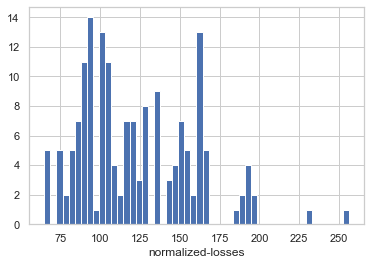

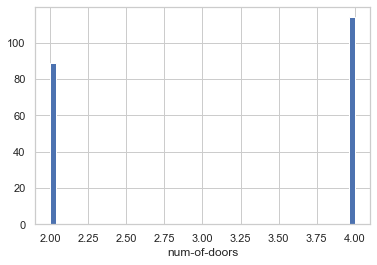

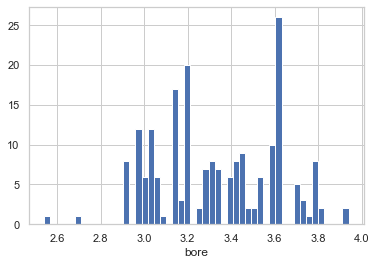

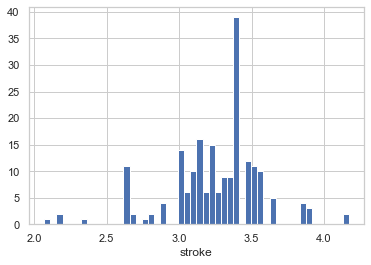

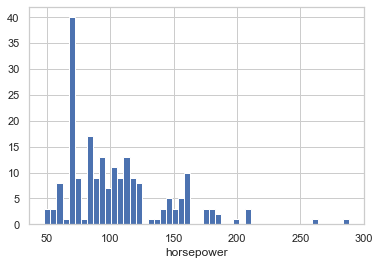

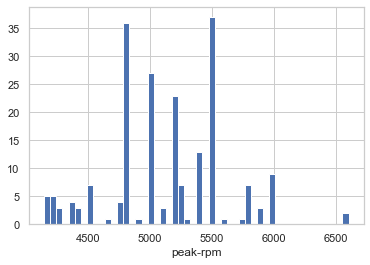

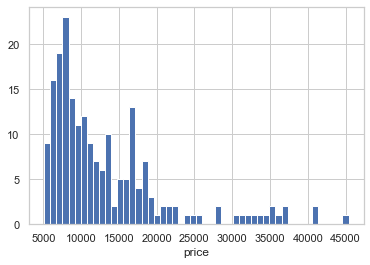

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
# Фильтр по пустым значениям поля normalized-losses 
data[data['normalized-losses'].isnull()].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [17]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['normalized-losses'].isnull()].index
flt_index

Int64Index([  0,   1,   2,   5,   7,   9,  14,  15,  16,  17,  43,  44,  45,
             46,  48,  49,  63,  66,  71,  73,  74,  75,  82,  83,  84, 109,
            110, 113, 114, 124, 126, 127, 128, 129, 130, 131, 181, 189, 191,
            192, 193],
           dtype='int64')

In [18]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [19]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['normalized-losses']

0     NaN
1     NaN
2     NaN
5     NaN
7     NaN
9     NaN
14    NaN
15    NaN
16    NaN
17    NaN
43    NaN
44    NaN
45    NaN
46    NaN
48    NaN
49    NaN
63    NaN
66    NaN
71    NaN
73    NaN
74    NaN
75    NaN
82    NaN
83    NaN
84    NaN
109   NaN
110   NaN
113   NaN
114   NaN
124   NaN
126   NaN
127   NaN
128   NaN
129   NaN
130   NaN
131   NaN
181   NaN
189   NaN
191   NaN
192   NaN
193   NaN
Name: normalized-losses, dtype: float64

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html#impute

In [20]:
data_num_norm_loss = data_num[['normalized-losses']]
data_num_norm_loss.head()

,normalized-losses
0,NaN
1,NaN
2,NaN
3,164.0
4,164.0


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_norm_loss)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

С помощью класса SimpleImputer проведем импьютацию с различными показателями центра распределения ("среднее", "медиана", "самое частое").

In [23]:
strategies=['mean', 'median','most_frequent']

In [24]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_norm_loss)
    return data_num_imp[mask_missing_values_only]

In [25]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([122., 122., 122., 122., 122., 122., 122., 122., 122., 122., 122.,
        122., 122., 122., 122., 122., 122., 122., 122., 122., 122., 122.,
        122., 122., 122., 122., 122., 122., 122., 122., 122., 122., 122.,
        122., 122., 122., 122., 122., 122., 122., 122.]))

In [26]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115., 115., 115., 115.,
        115., 115., 115., 115., 115., 115., 115., 115.]))

In [27]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([161., 161., 161., 161., 161., 161., 161., 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 161., 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 161., 161., 161., 161., 161.,
        161., 161., 161., 161., 161., 161., 161., 161.]))

In [28]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [29]:
data[['normalized-losses']].describe()

,normalized-losses
count,164.000000
mean,122.000000
std,35.442168
min,65.000000
25%,94.000000
50%,115.000000
75%,150.000000
max,256.000000


In [30]:
test_num_impute_col(data, 'normalized-losses', strategies[0])

('normalized-losses', 'mean', 41, 122.0, 122.0)

In [31]:
test_num_impute_col(data, 'normalized-losses', strategies[1])

('normalized-losses', 'median', 41, 115.0, 115.0)

In [32]:
test_num_impute_col(data, 'normalized-losses', strategies[2])

('normalized-losses', 'most_frequent', 41, 161.0, 161.0)

Таким образом можно избавиться от пропусков во всех колонках, но я хочу попробовать заполнить пропуски немного по-другому.

### Попытка более "осознанно" заполнить пропуски

Из описания набора данных известно, что значат все признаки. Учитывая их взаимосвязь между собой, можно попробовать приблизительно посчитать возможные значения пропущенных данных.

Попробуем это сделать на примере колонки с наибольшим количеством пропусков `normalized-losses`. [Веруться к описанию данных](#data_desc)

Раз этот показатель вычисляется среди автомобилей определнной классификации, то мы можем попробовать заменить пропуски данных в этой колонке средним значением этого показателя машин одного класса. Выберем в качестве классификации тип кузова. 

Например, если машина с пропущенной `normalized-value` имеет тип кузова `sedan`, то посчитаем среднее для всех `sedan` и вставим в пропуск.

Алгоритм написан таким образом, что работает с `tuples` для итерации по циклу. Из-за технических особенностей кортежей потребуется сначала немного переименовать колонки: везде поменять `-` на `_`.

In [33]:
data.columns = data.columns.str.replace('-', '_')
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [34]:
test_data = data.copy()
for row in test_data.itertuples():
     if np.isnan(row.normalized_losses):
            body_style_data = test_data.loc[test_data['body_style']== row.body_style]
            test_data.at[row.Index, 'normalized_losses'] = body_style_data['normalized_losses'].mean()
test_data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

Таким образом, мы убрали все пропуски в `normalized_losses`. Однако я хочу, чтобы средние значения были немного точнее.

Будем считать `normalized-losses` не просто для машин с одним кузовом, но только для тех, у кого кол-во лошадиных сил приблизительно совпадает с этим кол-вом у машины с пропуском данных.

Для этого сначала уберем пропуски в колонке `horsepower`. Обычно чем больше двигатель, тем больше л.с. он имеет. Поэтому будем искать дргуие автомобили с хотя бы похожим размером двигателя `engine_size`.

In [35]:
# Оценим стандартное отклонение размеров двигателя
data[['engine_size']].std()

engine_size    41.642693
dtype: float64

In [36]:
for row in data.itertuples():
     if np.isnan(row.horsepower):
            #Возьмём разборс размеров двигателей, равным половине от стандратного отклонения
            engine_size_data = data.loc[((row.engine_size - 20) < data['engine_size']) & (data['engine_size'] < (row.engine_size + 20))]
            data.at[row.Index, 'horsepower'] = engine_size_data['horsepower'].mean()
data['horsepower'].isnull().sum()

0

Теперь усложним наш алгоритм подсчета `normalized-value`. Будем среди машин с одинаковым кузовом искать те, у которых отличается кол-во л.с. максимум на 30 единиц.

Методом проб и ошибок выяснилось, что могут попадаться машины, кол-во л.с. которых будет сильно отличаться от машин того же кузова. Для таких машин будем вести подсчет только среди машин с тем же кузовом, без учета кол-ва л.с.

In [37]:
for row in data.itertuples():
     if np.isnan(row.normalized_losses):
            body_style_data = data.loc[data['body_style']== row.body_style]
            hp_and_body_data = body_style_data.loc[((row.horsepower - 30) < data['horsepower']) & (data['horsepower'] < (row.horsepower + 30))]
            if hp_and_body_data.shape[0] <= 1:
                data.at[row.Index, 'normalized_losses'] = body_style_data['normalized_losses'].mean()
            else:
                data.at[row.Index, 'normalized_losses'] = hp_and_body_data['normalized_losses'].mean()
            # Если и это не помогло, то просто считаем среднее по колонке:
            if np.isnan(data.at[row.Index, 'normalized_losses']):
                data.at[row.Index, 'normalized_losses'] = data['normalized_losses'].mean()
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           0
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

Способ далеко неидеальный но, возможно, таким образом мы добились более правдоподобных данных.

Для кол-ва дверей выберем для пропусков то кол-во, которое чаще повторяется среди машин того же кузова.

In [38]:
for row in data.itertuples():
     if np.isnan(row.num_of_doors):
            data_body_doors = data.loc[data['body_style'] == row.body_style, 'num_of_doors']
            data.at[row.Index, 'num_of_doors'] = data_body_doors.value_counts().argmax()
data['num_of_doors'].isnull().sum()

C:\Users\volko\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


0

#### Обработаем остальные пропуски данных. 
`bore` - диаметр цилиндра<br>
`stroke` - ход поршня
Эти параметры вероятнее всего зависят от размера двигателя. Используем этот факт для более точного заполнения пропусков.

In [39]:
for row in data.itertuples():
     if np.isnan(row.bore):
            #Возьмём разборс размеров двигателей, равным половине от стандратного отклонения
            engine_size_data = data.loc[((row.engine_size - 20) < data['engine_size']) & (data['engine_size'] < (row.engine_size + 20))]
            data.at[row.Index, 'bore'] = engine_size_data['bore'].mean()
     if np.isnan(row.stroke):
            engine_size_data = data.loc[((row.engine_size - 20) < data['engine_size']) & (data['engine_size'] < (row.engine_size + 20))]
            data.at[row.Index, 'stroke'] = engine_size_data['stroke'].mean()
print('Кол-во пропусков в bore:', data['bore'].isnull().sum())
print('Кол-во пропусков в stroke:', data['stroke'].isnull().sum())

Кол-во пропусков в bore: 0
Кол-во пропусков в stroke: 0


`peak-rpm` - макс. число оборотов двигателя в минуту
Скорее всего зависит от кол-ва лошадиных сил в двигателе.

In [40]:
for row in data.itertuples():
     if np.isnan(row.peak_rpm):
            #Возьмём разборс размеров двигателей, равным половине от стандратного отклонения
            hp_data = data.loc[((row.horsepower - 30) < data['horsepower']) & (data['horsepower'] < (row.horsepower + 30))]
            data.at[row.Index, 'peak_rpm'] = engine_size_data['peak_rpm'].mean()
print('Кол-во пропусков в peak_rpm:', data['peak_rpm'].isnull().sum())

Кол-во пропусков в peak_rpm: 0


Для заполнения пропусков в ценах автомобилей примением тот же метод, что и для заполнения `normalized-value`.

In [41]:
for row in data.itertuples():
     if np.isnan(row.price):
            body_style_data = data.loc[data['body_style']== row.body_style]
            hp_and_body_data = body_style_data.loc[((row.horsepower - 30) < data['horsepower']) & (data['horsepower'] < (row.horsepower + 30))]
            if hp_and_body_data.shape[0] <= 1:
                data.at[row.Index, 'price'] = body_style_data['price'].mean()
            else:
                data.at[row.Index, 'price'] = hp_and_body_data['price'].mean()
            # Если и это не помогло, то просто считаем среднее по колонке:
            if np.isnan(data.at[row.Index, 'price']):
                data.at[row.Index, 'price'] = data['price'].mean()
print('Кол-во пропусков в price:', data['price'].isnull().sum())

Кол-во пропусков в price: 0


#### Все пропуски в данных убраны

In [42]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### 1.2.2. Обработка пропусков в категориальных данных

Будем использовать набор данных о [домах в Мельбурне](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home).

In [43]:
data = pd.read_csv('../data/melbourne.csv', sep=',')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [44]:
data.shape

(13580, 21)

In [45]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [46]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Сконцентрируем внимание на колонке `CouncilArea`, который показывает <i>governing council for the area</i>, что означает нечто вроде [муниципалитетов в штате Виктория](https://en.wikipedia.org/wiki/Local_government_areas_of_Victoria)

In [47]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CouncilArea. Тип данных object. Количество пустых значений 1369, 10.08%.


In [48]:
# Выберем даннее только из этой колонки
cat_temp_data = data[['CouncilArea']]
cat_temp_data.head()

,CouncilArea
0,Yarra
1,Yarra
2,Yarra
3,Yarra
4,Yarra


In [49]:
# Названия всех муниципалитетов (все уникальные значения колонки)
cat_temp_data['CouncilArea'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', nan, 'Knox',
       'Maroondah', 'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik',
       'Whittlesea', 'Frankston', 'Macedon Ranges', 'Yarra Ranges',
       'Wyndham', 'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

In [50]:
# Размер колонки
cat_temp_data[cat_temp_data['CouncilArea'].isnull()].shape

(1369, 1)

In [51]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Yarra'],
       ['Yarra'],
       ['Yarra'],
       ...,
       ['Moreland'],
       ['Moreland'],
       ['Moreland']], dtype=object)

In [52]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
       'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
       'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
       'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
       'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
       'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
       'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)

Таким образом, мы избавились от пропусков в категориальных данных.

# 2. Преобразование категориальных признаков в числовые
Преобразуем названия муниципалитетов в числовые значения.

In [53]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Yarra
1,Yarra
2,Yarra
3,Yarra
4,Yarra
...,...
13575,Moreland
13576,Moreland
13577,Moreland
13578,Moreland


In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Для преобразования данных в числовые будем использовать LabelEncoder.

In [55]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [56]:
cat_enc['c1'].unique()

array(['Yarra', 'Moonee Valley', 'Port Phillip', 'Darebin', 'Hobsons Bay',
       'Stonnington', 'Boroondara', 'Monash', 'Glen Eira', 'Whitehorse',
       'Maribyrnong', 'Bayside', 'Moreland', 'Manningham', 'Banyule',
       'Melbourne', 'Kingston', 'Brimbank', 'Hume', 'Knox', 'Maroondah',
       'Casey', 'Melton', 'Greater Dandenong', 'Nillumbik', 'Whittlesea',
       'Frankston', 'Macedon Ranges', 'Yarra Ranges', 'Wyndham',
       'Cardinia', 'Unavailable', 'Moorabool'], dtype=object)

За каждым муниципалитетом теперь закреплен номер.

In [57]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

Стоит учитывать, что перед кодированием признаки сортируются в алфавитном порядке. Номера выдаются по алфавиту.

In [58]:
le.inverse_transform([0, 1, 2, 3, 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
       'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
       'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
       'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
       'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
       'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
       'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)

## 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [59]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [60]:
# Исходный размер данных. Просто колонка.
cat_enc.shape

(13580, 1)

Каждое уникальное значение было закодировано набором из 33 единиц и нулей.

In [61]:
cat_enc_ohe.shape

(13580, 33)

In [62]:
cat_enc_ohe

<13580x33 sparse matrix of type '<class 'numpy.float64'>'
	with 13580 stored elements in Compressed Sparse Row format>

Пример данных, хранящихся в матрице.

In [63]:
cat_enc_ohe.todense()[504:509]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])

Эти же данные в исходной колонке.

In [64]:
cat_enc[504:509]

,c1
504,Port Phillip
505,Port Phillip
506,Boroondara
507,Boroondara
508,Boroondara


#### Использование Pandas get_dummies - быстрого варианта one-hot кодирования

In [65]:
pd.get_dummies(cat_enc)[504:509]

,c1_Banyule,c1_Bayside,c1_Boroondara,c1_Brimbank,c1_Cardinia,c1_Casey,c1_Darebin,c1_Frankston,c1_Glen Eira,c1_Greater Dandenong,...,c1_Moreland,c1_Nillumbik,c1_Port Phillip,c1_Stonnington,c1_Unavailable,c1_Whitehorse,c1_Whittlesea,c1_Wyndham,c1_Yarra,c1_Yarra Ranges
504,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
505,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
506,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
pd.get_dummies(cat_temp_data, dummy_na=True)[504:509]

,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Cardinia,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,...,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,CouncilArea_nan
504,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
505,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
506,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Масштабирование данных

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])

Применим масштабирование данных на колонке `Price` используемого набора данных.

## 3.1 MinMax-масштабирование

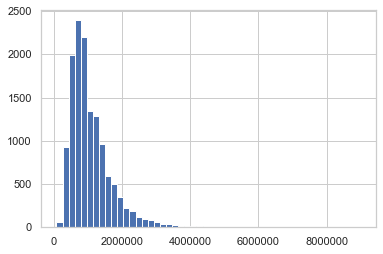

In [69]:
# До масштабирования:
plt.hist(data['Price'], 50)
plt.show()

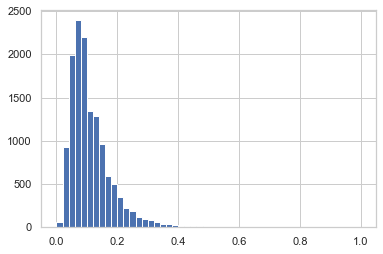

In [70]:
# После
plt.hist(sc1_data, 50)
plt.show()

## 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [71]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price']])

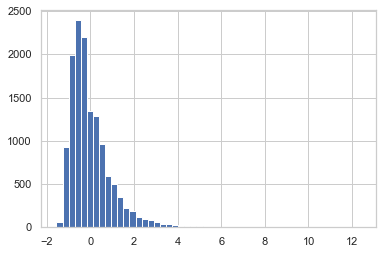

In [72]:
plt.hist(sc2_data, 50)
plt.show()

## 3.3. Нормализация данных

In [73]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['Price']])

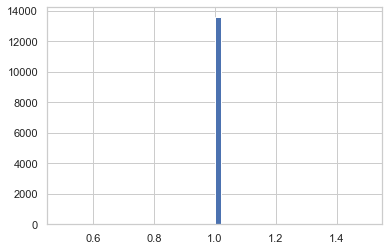

In [74]:
plt.hist(sc3_data, 50)
plt.show()